In [43]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor #modelo random forest
from sklearn.svm import SVR #support vector regression
from sklearn.linear_model import Ridge,Lasso # regression with regularization: Rigde: is given by the l2-norm. Also known as Ridge Regression 
# or Tikhonov regularization ///Lasso: Linear Model trained with L1 prior as regularizer (aka the Lasso)
from sklearn.kernel_ridge import KernelRidge #kernel ridge regression
from sklearn import preprocessing # para feature scaling
from sklearn.metrics import mean_squared_error, r2_score #métricas

In [44]:
%matplotlib inline

In [45]:
#import Data para modelado
file= 'DataframeImportsparamodelado.csv'
datos=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
datos.head(15)

,Africa,América Latina,América del Norte,Asia,Europa,Oceanía,otro,Agricultura y Silvicultura,"Ganadería, Apicultura, Caza, Pesca",Industrias Extractivas,Industrias Manufactureras,Servicios y Productos no Clasificados,Año,Mes,Monto,t-1,t-8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2000.0,9,36400806.0,51311091.0,30303804.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2000.0,10,50265853.0,36400806.0,21215828.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2000.0,11,59435550.0,50265853.0,31298113.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2000.0,12,68588145.0,59435550.0,33358374.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2001.0,1,57938134.0,68588145.0,67373766.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2001.0,2,46262851.0,57938134.0,58354363.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2001.0,3,48055653.0,46262851.0,47566573.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2001.0,4,49784064.0,48055653.0,51311091.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2001.0,5,45214985.0,49784064.0,36400806.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2001.0,6,49105659.0,45214985.0,50265853.0


In [46]:
#import Data variables de entrada 
file= 'DFImportsvarentrada.csv'
variables_entrada=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
variables_entrada.head(10)

,Pais_vendedor,industria,Año,Mes,Monto,t-1,t-8
0,América Latina,Industrias Manufactureras,2016.0,8,151413168.0,213204462.0,138478193.0
1,América Latina,Industrias Manufactureras,2016.0,9,135145030.0,151413168.0,133522068.0
2,América Latina,Industrias Manufactureras,2016.0,10,197032253.0,135145030.0,146672736.0
3,América Latina,Industrias Manufactureras,2016.0,11,178447140.0,197032253.0,148917364.0
4,América Latina,Industrias Manufactureras,2016.0,12,173112296.0,178447140.0,127890003.0
5,América Latina,Industrias Manufactureras,2017.0,1,195899079.0,173112296.0,172840193.0
6,América Latina,Industrias Manufactureras,2017.0,2,183503634.0,195899079.0,168955795.0
7,América Latina,Industrias Manufactureras,2017.0,3,152810474.0,183503634.0,213204462.0
8,América Latina,Industrias Manufactureras,2017.0,4,207662307.0,152810474.0,151413168.0
9,América Latina,Industrias Manufactureras,2017.0,5,185470521.0,207662307.0,135145030.0


In [47]:
#funcion para facilitar el modelado de random forest
def modelfit(algorithm,datos,tipo,final_lags,printFeatureImportance=True): 
        
    #dividir train, y tst
    data_train=datos.query('(Año==2016 & Mes<8) or (Año<2016)').reset_index(drop=True) #desde Julio 2000 a Julio 2016
    data_test=datos.query('Año == 2017 or (Año==2016 & Mes>7)').reset_index(drop=True) #ultimos 12 meses(agosto 2016 a julio 2017)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,14:15]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,14:15]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,4:5]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,4:5]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
                  
    #Fit the algorithm on the training data
    algorithm.fit(X_train,Y_train)
    
    #Predict test set:  #hace predicción mes con mes y las va sustituyendo en el conjunto X_test para las siguientes predicciones 
    total_lags=[1,2,3,4,5,6,7,8,9,10,11]#todos los rezagos 
    meses_apredecir=[8,9,10,11,12,1,2,3,4,5,6] #meses a predecir en el ciclo for(11 meses) el 12° mes se predice por separado al último
    aux=0 #se utiliza para ir disminuyendo el umbral para saber si el mes a reemplazar pertenece a 2016 o 2017 a partir del mes 12 2016 todos los 
    #reemplazos se harán en el año 2017
    resultados=pd.DataFrame(data=np.zeros((420,1)),columns=['Prediccion']) #Data frame donde se guardarán los pronósticos 
    
    for t,mes_predic in zip(range(1,12,1),meses_apredecir):  ########aureca , es el bueno por fin!
        if t<6:
            año_predic=2016
        else:
            año_predic=2017
        dtest_predictions = algorithm.predict(X_test[(X_test.Año==año_predic) & (X_test.Mes==mes_predic)].reset_index(drop=True)) #hacer predicciones
        #mes con mes 

        lags=set(total_lags).intersection(final_lags) #para encontrar los que coinciden entre total_lags y final_lags 
        lags=list(lags) #rezagos a reemplazar en cada iteración de predicciones 

        index=list(range(1,13-t,1))
        meses=pd.DataFrame([9,10,11,12,1,2,3,4,5,6,7],columns=['Meses']) #todos los meses en los que se reemplazarían las predicciones 
        meses=meses.iloc[t-1:,:]
        meses['index']=index
        meses=meses.set_index('index')
        meses=meses.loc[lags,:]
        meses=meses.Meses.values.tolist() #meses en los que se reemplaza las predicciones dados los rezagos significativos (final_lags)

        total_lags=total_lags[:-1] #para ir eliminando el último elemento de la lista "total_lags"

        for i,j in zip(lags,meses): #ciclo para ir reemplazando las predicciones ,"i" sería el contador para rezagos y "j" contador para meses a reemplazar
            if i<(5-aux):# para separar 2016 y 2017
                año_replace=2016
            else:
                año_replace=2017
            rows_toreplace=X_test[(X_test.Año==año_replace) & (X_test.Mes==j)].index.values # filas a reemplazar con predicciones
            X_test.loc[rows_toreplace,'t-'+str(i)]=dtest_predictions #reemplazando los datos reales por las predicciones en conjunto test
        aux=aux+1 
        #print(dtest_predictions)
        resultados.Prediccion[(t-1)*35:t*35]=dtest_predictions #35 porque se hacen de 35 en 35 predicciones 

    ##predicciones del último mes( Julio 2017)
    dtest_predictions = algorithm.predict(X_test[(X_test.Año==2017) & (X_test.Mes==7)].reset_index(drop=True)) 
    resultados.Prediccion[t*35:]=dtest_predictions
        
    #errores personalizados para test set:
    diferencias_abs=pd.DataFrame(abs(Y_test.values-resultados.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados.Prediccion)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    print ("Test mean_squared_error : %.4g" % mean_squared_error(Y_test.values, resultados.Prediccion))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error)
    print ("Test error del monto de cada prediccion(420) : %.4g" %porcentaje_error_abs)
           
    #Print Feature Importance:
    if printFeatureImportance:
        predictors=list(X_train.columns.values)
        feat_imp = pd.Series(algorithm.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    return resultados,Y_test

C:\Users\Edu\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Edu\Anaconda3\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Model Report
Test mean_squared_error : 3.059e+17
Test error de la suma total de todas las predicciones : 0.08014
Test error del monto de cada prediccion(420) : 1.687


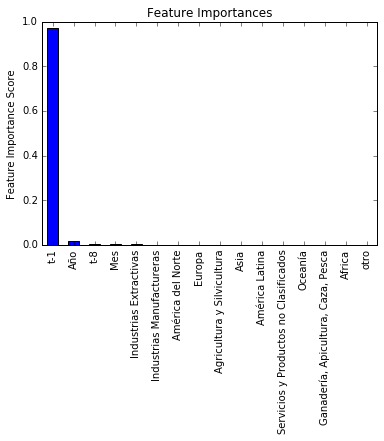

In [48]:
#crear modelo y mandar llamar funcion para modelado(random forest)
tipo=1
final_lags=[1,8] #rezagos significativos 
gbm0 = RandomForestRegressor(random_state=1) # default parameters, gini by dedault 
resultados_fun_rf,Y_test_rf=modelfit(gbm0,datos,tipo,final_lags)

In [49]:
#exportar vector de datos reales mensuales para comparación de predicciones anuales convertidas a mensuales:
Y_test_rf.to_csv('realesimp.csv')

In [8]:
#funcion para modelar regresiones con penalización L1(lasso) y L2(ridge):

def regresiones(datos,tipo,final_lags,Alpha,normalizar_l2norm=True): #si normalizar_l2norm es "true" se hará normalización subtracting the mean
    #and dividing by the l2-norm. else: estandarización con preprocessing, Standardize features by removing the mean and scaling to unit variance
    
    #dividir train,cross y tst:
    data_train=datos.query('(Año==2016 & Mes<8) or (Año<2016)').reset_index(drop=True) #desde Julio 2000 a Julio 2016
    data_test=datos.query('Año == 2017 or (Año==2016 & Mes>7)').reset_index(drop=True) #ultimos 12 meses(agosto 2016 a julio 2017)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,14:15]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,14:15]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,4:5]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,4:5]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    if normalizar_l2norm:
        #scaler para normalizar prediccioens para reemplazo en razagos 
        scaler_y=preprocessing.StandardScaler().fit(Y_train) #sacar medias y varianzas de variable respuesta(traning) para normalizar
        #predicciones antes del reemplazo en rezagos
        
        #entrenar modelos con training data set
        Lasso_reg= Lasso(alpha=Alpha,normalize=True).fit(X_train,Y_train)#alpha :Constant that multiplies the L1 term. Defaults to 1.0
        Ridge_reg= Ridge(alpha=Alpha,normalize=True,solver='auto').fit(X_train,Y_train)#alpha :Regularization strength; must be a positive float. 
        #Regularization improves the conditioning of the problem and reduces the variance of the estimates. 
        
    else:
        #soft normalization:
    
        columns_names=list(X_train.columns) #obtener nombres de columnas(variables) para no perderlos
        scaler = preprocessing.StandardScaler().fit(X_train) #sacar medias y varianzas del training set para futura normalización
        scaler_y=preprocessing.StandardScaler().fit(Y_train) #sacar medias y varianzas de variable respuesta(traning) para normalizar
        #predicciones antes del reemplazo en rezagos
    
        X_train=scaler.transform(X_train) #normalizar training set
        X_train=pd.DataFrame(X_train,columns=columns_names) #convertir de array a DataFrame
        
        X_test_n=scaler.transform(X_test) #normalizar test set
        X_test_n=pd.DataFrame(X_test_n,columns=columns_names) #convertir de array a DataFram
    
        #entrenar modelos con training data set
        Lasso_reg= Lasso(alpha=Alpha,normalize=False).fit(X_train,Y_train)#alpha :Constant that multiplies the L1 term. Defaults to 1.0
        Ridge_reg= Ridge(alpha=Alpha,normalize=False,solver='auto').fit(X_train,Y_train)#alpha :Regularization strength; must be a positive float. 
        #Regularization improves the conditioning of the problem and reduces the variance of the estimates.                                       
    
 
    # hacer predicciones de test data set::
    
    ########### predicciones con regresion Lasso : #################
    
    #Predict test set:  #hace predicción mes con mes y las va sustituyendo en el conjunto X_test para las siguientes predicciones 
 
    total_lags=[1,2,3,4,5,6,7,8,9,10,11]#todos los rezagos 
    meses_apredecir=[8,9,10,11,12,1,2,3,4,5,6] #meses a predecir en el ciclo for(11 meses) el 12° mes se predice por separado al último
    aux=0 #se utiliza para ir disminuyendo el umbral para saber si el mes a reemplazar pertenece a 2016 o 2017 a partir del mes 12 2016 todos los 
    #reemplazos se harán en el año 2017
    resultados_lasso=pd.DataFrame(data=np.zeros((420,1)),columns=['Prediccion']) #Data frame donde se guardarán los pronósticos 
    
    for t,mes_predic in zip(range(1,12,1),meses_apredecir):  ########aureca , es el bueno por fin!
        if t<6:
            año_predic=2016
        else:
            año_predic=2017
        rows_topredict=X_test[(X_test.Año==año_predic) & (X_test.Mes==mes_predic)].index.values #indices de filas de las que se harán predicciones
        
        if normalizar_l2norm:
            dtest_predictions = Lasso_reg.predict(X_test.loc[rows_topredict,:])#hacer predicciones mes con mes en X_test normal sklearn normaliza
            dtest_predictions_reshape=dtest_predictions.reshape(-1, 1) # reshape para el scaler "arrojaba warnings"
            dtest_predictions_n=scaler_y.transform(dtest_predictions_reshape) #normalizar predicciones para reemplazo en rezagos
            dtest_predictions_n=dtest_predictions_n.reshape(-1,) #deshacer efecto del reshape que se usó para el scaler
        else:
            dtest_predictions = Lasso_reg.predict(X_test_n.loc[rows_topredict,:])#hacer predicciones mes con mes en X_test normalizado
            dtest_predictions_reshape=dtest_predictions.reshape(-1, 1) # reshape para el scaler "arrojaba warnings"
            dtest_predictions_n=scaler_y.transform(dtest_predictions_reshape) #normalizar predicciones para reemplazo en rezagos
            dtest_predictions_n=dtest_predictions_n.reshape(-1,) #deshacer efecto del reshape que se usó para el scaler 
        
        lags=set(total_lags).intersection(final_lags) #para encontrar los que coinciden entre total_lags y final_lags 
        lags=list(lags) #rezagos a reemplazar en cada iteración de predicciones 

        index=list(range(1,13-t,1))
        meses=pd.DataFrame([9,10,11,12,1,2,3,4,5,6,7],columns=['Meses']) #todos los meses en los que se reemplazarían las predicciones 
        meses=meses.iloc[t-1:,:]
        meses['index']=index
        meses=meses.set_index('index')
        meses=meses.loc[lags,:]
        meses=meses.Meses.values.tolist() #meses en los que se reemplaza las predicciones dados los rezagos significativos (final_lags)

        total_lags=total_lags[:-1] #para ir eliminando el último elemento de la lista "total_lags"

        for i,j in zip(lags,meses): #ciclo para ir reemplazando las predicciones ,"i" sería el contador para rezagos y "j" contador para meses a reemplazar
            if i<(5-aux):# para separar 2016 y 2017
                año_replace=2016
            else:
                año_replace=2017
                
            rows_toreplace=X_test[(X_test.Año==año_replace) & (X_test.Mes==j)].index.values # filas a reemplazar con predicciones
            
            if normalizar_l2norm:
                X_test.loc[rows_toreplace,'t-'+str(i)]=dtest_predictions_n #reemplazando datos reales por las predicciones en test 
            else:
                X_test_n.loc[rows_toreplace,'t-'+str(i)]=dtest_predictions_n #reemplazando datos reales por las predicciones en test norm
        aux=aux+1 
        #print(dtest_predictions)
        resultados_lasso.Prediccion[(t-1)*35:t*35]=dtest_predictions #35 porque se hacen de 35 en 35 predicciones 

    ##predicciones del último mes( Julio 2017)
    rows_topredict=X_test[(X_test.Año==2017) & (X_test.Mes==7)].index.values #indices de filas de las que se harán predicciones
    if normalizar_l2norm:
        dtest_predictions = Lasso_reg.predict(X_test.loc[rows_topredict,:])
    else:
        dtest_predictions = Lasso_reg.predict(X_test_n.loc[rows_topredict,:])
    resultados_lasso.Prediccion[t*35:]=dtest_predictions
    
    #errores personalizados para test set:
    diferencias_abs=pd.DataFrame(abs(Y_test.values-resultados_lasso.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lasso.Prediccion)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Lasso")
    print('\t alpha: %1.3f' %Alpha)
    print ("Test R2(coefficient of determination) Lasso: %.4g" % r2_score(Y_test.values,resultados_lasso.Prediccion))
    print ("Test mean square error Lasso: %.4g" % mean_squared_error(Y_test.values,resultados_lasso.Prediccion))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error)
    print ("Test error del monto de cada prediccion(420) : %.4g" %porcentaje_error_abs)
    
    ########### predicciones con regresion Ridge:#################
    
    #Predict test set:  #hace predicción mes con mes y las va sustituyendo en el conjunto X_test para las siguientes predicciones 
 
    total_lags=[1,2,3,4,5,6,7,8,9,10,11]#todos los rezagos 
    meses_apredecir=[8,9,10,11,12,1,2,3,4,5,6] #meses a predecir en el ciclo for(11 meses) el 12° mes se predice por separado al último
    aux=0 #se utiliza para ir disminuyendo el umbral para saber si el mes a reemplazar pertenece a 2016 o 2017 a partir del mes 12 2016 todos los 
    #reemplazos se harán en el año 2017
    resultados_ridge=pd.DataFrame(data=np.zeros((420,1)),columns=['Prediccion']) #Data frame donde se guardarán los pronósticos 
    
    for t,mes_predic in zip(range(1,12,1),meses_apredecir):  ########aureca , es el bueno por fin!
        if t<6:
            año_predic=2016
        else:
            año_predic=2017
        rows_topredict=X_test[(X_test.Año==año_predic) & (X_test.Mes==mes_predic)].index.values #indices de filas de las que se harán predicciones
        
        if normalizar_l2norm:
            dtest_predictions = Ridge_reg.predict(X_test.loc[rows_topredict,:])#hacer predicciones mes con mes en X_test normal sklearn normaliza
            #dtest_predictions_reshape=dtest_predictions.reshape(-1, 1) # reshape para el scaler "arrojaba warnings"
            dtest_predictions_n=scaler_y.transform(dtest_predictions) #normalizar predicciones para reemplazo en rezagos
            dtest_predictions_n=dtest_predictions_n.reshape(-1,) #deshacer efecto del reshape que se usó para el scaler
            dtest_predictions=dtest_predictions.reshape(-1,)
        else:
            dtest_predictions = Ridge_reg.predict(X_test_n.loc[rows_topredict,:])#hacer predicciones mes con mes en X_test normalizado
            #dtest_predictions_reshape=dtest_predictions.reshape(-1, 1) # reshape para el scaler "arrojaba warnings"
            dtest_predictions_n=scaler_y.transform(dtest_predictions) #normalizar predicciones para reemplazo en rezagos
            dtest_predictions_n=dtest_predictions_n.reshape(-1,) #deshacer efecto del reshape que se usó para el scaler
            dtest_predictions=dtest_predictions.reshape(-1,)
        
        lags=set(total_lags).intersection(final_lags) #para encontrar los que coinciden entre total_lags y final_lags 
        lags=list(lags) #rezagos a reemplazar en cada iteración de predicciones 

        index=list(range(1,13-t,1))
        meses=pd.DataFrame([9,10,11,12,1,2,3,4,5,6,7],columns=['Meses']) #todos los meses en los que se reemplazarían las predicciones 
        meses=meses.iloc[t-1:,:]
        meses['index']=index
        meses=meses.set_index('index')
        meses=meses.loc[lags,:]
        meses=meses.Meses.values.tolist() #meses en los que se reemplaza las predicciones dados los rezagos significativos (final_lags)

        total_lags=total_lags[:-1] #para ir eliminando el último elemento de la lista "total_lags"

        for i,j in zip(lags,meses): #ciclo para ir reemplazando las predicciones ,"i" sería el contador para rezagos y "j" contador para meses a reemplazar
            if i<(5-aux):# para separar 2016 y 2017
                año_replace=2016
            else:
                año_replace=2017
                
            rows_toreplace=X_test[(X_test.Año==año_replace) & (X_test.Mes==j)].index.values # filas a reemplazar con predicciones
            
            if normalizar_l2norm:
                X_test.loc[rows_toreplace,'t-'+str(i)]=dtest_predictions_n #reemplazando datos reales por las predicciones en test 
            else:
                X_test_n.loc[rows_toreplace,'t-'+str(i)]=dtest_predictions_n #reemplazando datos reales por las predicciones en test norm
        aux=aux+1 
        #print(dtest_predictions)
        resultados_ridge.Prediccion[(t-1)*35:t*35]=dtest_predictions #35 porque se hacen de 35 en 35 predicciones 

    ##predicciones del último mes( Julio 2017)
    rows_topredict=X_test[(X_test.Año==2017) & (X_test.Mes==7)].index.values #indices de filas de las que se harán predicciones
    if normalizar_l2norm:
        dtest_predictions = Ridge_reg.predict(X_test.loc[rows_topredict,:])
        dtest_predictions= dtest_predictions.reshape(-1,)
    else:
        dtest_predictions = Ridge_reg.predict(X_test_n.loc[rows_topredict,:])
        dtest_predictions= dtest_predictions.reshape(-1,)
    resultados_ridge.Prediccion[t*35:]=dtest_predictions
    
    #errores personalizados para test set:
    diferencias_abs=pd.DataFrame(abs(Y_test.values-resultados_ridge.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_ridge.Prediccion)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Ridge")
    print('\t alpha: %1.3f' %Alpha)
    print ("Test R2(coefficient of determination) Ridge: %.4g" % r2_score(Y_test.values,resultados_ridge.Prediccion))
    print ("Test mean square error Ridge: %.4g" % mean_squared_error(Y_test.values,resultados_ridge.Prediccion))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error)
    print ("Test error del monto de cada prediccion(420) : %.4g" %porcentaje_error_abs)
            
    ###hacer data frame con los resultados de los 2 tipos de penalización:
    
    resultados_fun=pd.DataFrame(np.zeros((len(resultados_lasso),2)),columns=['Lasso','Ridge'])
    
    resultados_fun.loc[:,'Lasso']=resultados_lasso.Prediccion
    resultados_fun.loc[:,'Ridge']=resultados_ridge.Prediccion
    
    return   Y_test,resultados_fun

In [10]:
#mandar llamar funcion para modelar regresiones: ###fueron malos
        
Alpha=10
Y_test_regre,resultados_fun_regre=regresiones(datos,tipo,final_lags,Alpha,normalizar_l2norm=True) 

C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\Users\Edu\Anaconda3\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Model Report Lasso
	 alpha: 10.000
Test R2(coefficient of determination) Lasso: -0.1373
Test mean square error Lasso: 2.04e+17
Test error de la suma total de todas las predicciones : 0.8475
Test error del monto de cada prediccion(420) : 1.092

Model Report Ridge
	 alpha: 10.000
Test R2(coefficient of determination) Ridge: -0.01272
Test mean square error Ridge: 1.816e+17
Test error de la suma total de todas las predicciones : 0.4066
Test error del monto de cada prediccion(420) : 1.362


In [50]:
#funcion para modelar Regresion Kernel Ridge
def kernel_ridge(datos,tipo,final_lags,Alpha,pol_degree,g): 
    
    #dividir train,cross y tst:
    data_train=datos.query('(Año==2016 & Mes<8) or (Año<2016)').reset_index(drop=True) #desde Julio 2000 a Julio 2016
    data_test=datos.query('Año == 2017 or (Año==2016 & Mes>7)').reset_index(drop=True) #ultimos 12 meses(agosto 2016 a julio 2017)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,14:15]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,14:15]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,4:5]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,4:5]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
    
    #soft normalization:
    
    columns_names=list(X_train.columns) #obtener nombres de columnas(variables) para no perderlos
    scaler = preprocessing.StandardScaler().fit(X_train) #sacar medias y varianzas del training set para futura normalización
    scaler_y=preprocessing.StandardScaler().fit(Y_train) #sacar medias y varianzas de variable respuesta(traning) para normalizar
    #predicciones antes del reemplazo en rezagos
    
    X_train=scaler.transform(X_train) #normalizar training set
    X_train=pd.DataFrame(X_train,columns=columns_names) #convertir de array a DataFrame
        
    X_test_n=scaler.transform(X_test) #normalizar test set
    X_test_n=pd.DataFrame(X_test_n,columns=columns_names) #convertir de array a DataFram
    
    #entrenar modelos con training data set
    
    Kridge_linear = KernelRidge(kernel='linear',alpha=Alpha).fit(X_train,Y_train)#Small positive values of alpha improve the conditioning 
    #of the problem and reduce the variance of the estimates
    Kridge_poly = KernelRidge(kernel='poly',degree=pol_degree,alpha=Alpha,gamma=g).fit(X_train,Y_train) 
    Kridge_rbf = KernelRidge(kernel='rbf',alpha=Alpha,gamma=g).fit(X_train,Y_train) #gamma es el coeficiente del kernel/gamma es el ancho del guassiano                                                  
    Kridge_laplacian= KernelRidge(kernel='laplacian',alpha=Alpha,gamma=g).fit(X_train,Y_train) # "C" is the penalization for error term
    
    # hacer predicciones de test data set::
    
    ########### predicciones con kernel lineal: #################
    
    #Predict test set:  #hace predicción mes con mes y las va sustituyendo en el conjunto X_test para las siguientes predicciones 
 
    total_lags=[1,2,3,4,5,6,7,8,9,10,11]#todos los rezagos 
    meses_apredecir=[8,9,10,11,12,1,2,3,4,5,6] #meses a predecir en el ciclo for(11 meses) el 12° mes se predice por separado al último
    aux=0 #se utiliza para ir disminuyendo el umbral para saber si el mes a reemplazar pertenece a 2016 o 2017 a partir del mes 12 2016 todos los 
    #reemplazos se harán en el año 2017
    resultados_lineal=pd.DataFrame(data=np.zeros((420,1)),columns=['Prediccion']) #Data frame donde se guardarán los pronósticos 
    
    for t,mes_predic in zip(range(1,12,1),meses_apredecir):  ########aureca , es el bueno por fin!
        if t<6:
            año_predic=2016
        else:
            año_predic=2017
        rows_topredict=X_test[(X_test.Año==año_predic) & (X_test.Mes==mes_predic)].index.values #indices de filas de las que se harán predicciones
        dtest_predictions = Kridge_linear.predict(X_test_n.loc[rows_topredict,:])#hacer predicciones mes con mes 
        #dtest_predictions_reshape=dtest_predictions.reshape(-1, 1) # reshape para el scaler "arrojaba warnings"
        dtest_predictions_n=scaler_y.transform(dtest_predictions) #normalizar predicciones para reemplazo en rezagos
        dtest_predictions_n=dtest_predictions_n.reshape(-1,) #deshacer efecto del reshape que se usó para el scaler 
        dtest_predictions=dtest_predictions.reshape(-1,)
        
        lags=set(total_lags).intersection(final_lags) #para encontrar los que coinciden entre total_lags y final_lags 
        lags=list(lags) #rezagos a reemplazar en cada iteración de predicciones 

        index=list(range(1,13-t,1))
        meses=pd.DataFrame([9,10,11,12,1,2,3,4,5,6,7],columns=['Meses']) #todos los meses en los que se reemplazarían las predicciones 
        meses=meses.iloc[t-1:,:]
        meses['index']=index
        meses=meses.set_index('index')
        meses=meses.loc[lags,:]
        meses=meses.Meses.values.tolist() #meses en los que se reemplaza las predicciones dados los rezagos significativos (final_lags)

        total_lags=total_lags[:-1] #para ir eliminando el último elemento de la lista "total_lags"

        for i,j in zip(lags,meses): #ciclo para ir reemplazando las predicciones ,"i" sería el contador para rezagos y "j" contador para meses a reemplazar
            if i<(5-aux):# para separar 2016 y 2017
                año_replace=2016
            else:
                año_replace=2017
            rows_toreplace=X_test[(X_test.Año==año_replace) & (X_test.Mes==j)].index.values # filas a reemplazar con predicciones
            X_test_n.loc[rows_toreplace,'t-'+str(i)]=dtest_predictions_n #reemplazando los datos reales por las predicciones en conjunto test
        aux=aux+1 
        #print(dtest_predictions)
        resultados_lineal.Prediccion[(t-1)*35:t*35]=dtest_predictions #35 porque se hacen de 35 en 35 predicciones 

    ##predicciones del último mes( Julio 2017)
    rows_topredict=X_test[(X_test.Año==2017) & (X_test.Mes==7)].index.values #indices de filas de las que se harán predicciones
    dtest_predictions = Kridge_linear.predict(X_test_n.loc[rows_topredict,:])
    dtest_predictions=dtest_predictions.reshape(-1,)
    resultados_lineal.Prediccion[t*35:]=dtest_predictions
    
    #errores personalizados para test set:
    diferencias_abs=pd.DataFrame(abs(Y_test.values-resultados_lineal.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lineal.Prediccion)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Linear Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print ("Test mean_squared_error Linear Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lineal.Prediccion))
    print ("Test R2(coefficient of determination) Linear Kernel: %.4g" % r2_score(Y_test.values,resultados_lineal.Prediccion))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error)
    print ("Test error del monto de cada prediccion(420) : %.4g" %porcentaje_error_abs)
    
    ########### predicciones con kernel polinomial:#################
    
    #Predict test set:  #hace predicción mes con mes y las va sustituyendo en el conjunto X_test para las siguientes predicciones 
 
    total_lags=[1,2,3,4,5,6,7,8,9,10,11]#todos los rezagos 
    meses_apredecir=[8,9,10,11,12,1,2,3,4,5,6] #meses a predecir en el ciclo for(11 meses) el 12° mes se predice por separado al último
    aux=0 #se utiliza para ir disminuyendo el umbral para saber si el mes a reemplazar pertenece a 2016 o 2017 a partir del mes 12 2016 todos los 
    #reemplazos se harán en el año 2017
    resultados_poly=pd.DataFrame(data=np.zeros((420,1)),columns=['Prediccion']) #Data frame donde se guardarán los pronósticos 
    
    for t,mes_predic in zip(range(1,12,1),meses_apredecir):  ########aureca , es el bueno por fin!
        if t<6:
            año_predic=2016
        else:
            año_predic=2017
        rows_topredict=X_test[(X_test.Año==año_predic) & (X_test.Mes==mes_predic)].index.values #indices de filas de las que se harán predicciones
        dtest_predictions = Kridge_poly.predict(X_test_n.loc[rows_topredict,:]) #hacer predicciones mes con mes
        #dtest_predictions_reshape=dtest_predictions.reshape(-1, 1) # reshape para el scaler "arrojaba warnings"
        dtest_predictions_n=scaler_y.transform(dtest_predictions) #normalizar predicciones para reemplazo en rezagos
        dtest_predictions_n=dtest_predictions_n.reshape(-1,) #deshacer efecto del reshape que se usó para el scaler
        dtest_predictions=dtest_predictions.reshape(-1,)
        
        lags=set(total_lags).intersection(final_lags) #para encontrar los que coinciden entre total_lags y final_lags 
        lags=list(lags) #rezagos a reemplazar en cada iteración de predicciones 

        index=list(range(1,13-t,1))
        meses=pd.DataFrame([9,10,11,12,1,2,3,4,5,6,7],columns=['Meses']) #todos los meses en los que se reemplazarían las predicciones 
        meses=meses.iloc[t-1:,:]
        meses['index']=index
        meses=meses.set_index('index')
        meses=meses.loc[lags,:]
        meses=meses.Meses.values.tolist() #meses en los que se reemplaza las predicciones dados los rezagos significativos (final_lags)

        total_lags=total_lags[:-1] #para ir eliminando el último elemento de la lista "total_lags"

        for i,j in zip(lags,meses): #ciclo para ir reemplazando las predicciones ,"i" sería el contador para rezagos y "j" contador para meses a reemplazar
            if i<(5-aux):# para separar 2016 y 2017
                año_replace=2016
            else:
                año_replace=2017
            rows_toreplace=X_test[(X_test.Año==año_replace) & (X_test.Mes==j)].index.values # filas a reemplazar con predicciones
            X_test_n.loc[rows_toreplace,'t-'+str(i)]=dtest_predictions_n #reemplazando los datos reales por las predicciones en conjunto test
        aux=aux+1 
        #print(dtest_predictions)
        resultados_poly.Prediccion[(t-1)*35:t*35]=dtest_predictions #35 porque se hacen de 35 en 35 predicciones 

    ##predicciones del último mes( Julio 2017)
    
    rows_topredict=X_test[(X_test.Año==2017) & (X_test.Mes==7)].index.values #indices de filas de las que se harán predicciones
    dtest_predictions = Kridge_poly.predict(X_test_n.loc[rows_topredict,:])
    dtest_predictions=dtest_predictions.reshape(-1,)
    resultados_poly.Prediccion[t*35:]=dtest_predictions
    
    #errores personalizados para test set:
    diferencias_abs=pd.DataFrame(abs(Y_test.values-resultados_poly.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_poly.Prediccion)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Polynomial Kernel")
    print('\t Grado polinomio %1.3f' %pol_degree)
    print('\t Alpha: %1.3f' %Alpha)
    print('\t Gamma: %1.3f' %g)
    print ("Test mean_squared_error Polynomial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_poly.Prediccion))
    print ("Test R2(coefficient of determination) Polynomial Kernel: %.4g" % r2_score(Y_test.values,resultados_poly.Prediccion))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error)
    print ("Test error del monto de cada prediccion(420) : %.4g" %porcentaje_error_abs)
    
    
    ########### predicciones con kernel Radial:#################
    
    #Predict test set:  #hace predicción mes con mes y las va sustituyendo en el conjunto X_test para las siguientes predicciones 
 
    total_lags=[1,2,3,4,5,6,7,8,9,10,11]#todos los rezagos 
    meses_apredecir=[8,9,10,11,12,1,2,3,4,5,6] #meses a predecir en el ciclo for(11 meses) el 12° mes se predice por separado al último
    aux=0 #se utiliza para ir disminuyendo el umbral para saber si el mes a reemplazar pertenece a 2016 o 2017 a partir del mes 12 2016 todos los 
    #reemplazos se harán en el año 2017
    resultados_rbf=pd.DataFrame(data=np.zeros((420,1)),columns=['Prediccion']) #Data frame donde se guardarán los pronósticos 
    
    for t,mes_predic in zip(range(1,12,1),meses_apredecir):  ########aureca , es el bueno por fin!
        if t<6:
            año_predic=2016
        else:
            año_predic=2017
        rows_topredict=X_test[(X_test.Año==año_predic) & (X_test.Mes==mes_predic)].index.values #indices de filas de las que se harán predicciones
        dtest_predictions = Kridge_rbf.predict(X_test_n.loc[rows_topredict,:])#hacer predicciones mes con mes 
        #dtest_predictions_reshape=dtest_predictions.reshape(-1, 1) # reshape para el scaler "arrojaba warnings"
        dtest_predictions_n=scaler_y.transform(dtest_predictions) #normalizar predicciones para reemplazo en rezagos
        dtest_predictions_n=dtest_predictions_n.reshape(-1,) #deshacer efecto del reshape que se usó para el scaler 
        dtest_predictions=dtest_predictions.reshape(-1,)
        
        lags=set(total_lags).intersection(final_lags) #para encontrar los que coinciden entre total_lags y final_lags 
        lags=list(lags) #rezagos a reemplazar en cada iteración de predicciones 

        index=list(range(1,13-t,1))
        meses=pd.DataFrame([9,10,11,12,1,2,3,4,5,6,7],columns=['Meses']) #todos los meses en los que se reemplazarían las predicciones 
        meses=meses.iloc[t-1:,:]
        meses['index']=index
        meses=meses.set_index('index')
        meses=meses.loc[lags,:]
        meses=meses.Meses.values.tolist() #meses en los que se reemplaza las predicciones dados los rezagos significativos (final_lags)

        total_lags=total_lags[:-1] #para ir eliminando el último elemento de la lista "total_lags"

        for i,j in zip(lags,meses): #ciclo para ir reemplazando las predicciones ,"i" sería el contador para rezagos y "j" contador para meses a reemplazar
            if i<(5-aux):# para separar 2016 y 2017
                año_replace=2016
            else:
                año_replace=2017
            rows_toreplace=X_test[(X_test.Año==año_replace) & (X_test.Mes==j)].index.values # filas a reemplazar con predicciones
            X_test_n.loc[rows_toreplace,'t-'+str(i)]=dtest_predictions_n #reemplazando los datos reales por las predicciones en conjunto test
        aux=aux+1 
        #print(dtest_predictions)
        resultados_rbf.Prediccion[(t-1)*35:t*35]=dtest_predictions #35 porque se hacen de 35 en 35 predicciones 

    ##predicciones del último mes( Julio 2017)
    rows_topredict=X_test[(X_test.Año==2017) & (X_test.Mes==7)].index.values #indices de filas de las que se harán predicciones
    dtest_predictions = Kridge_rbf.predict(X_test_n.loc[rows_topredict,:])
    dtest_predictions=dtest_predictions.reshape(-1,)
    resultados_rbf.Prediccion[t*35:]=dtest_predictions
    
    #errores personalizados para test set:
    diferencias_abs=pd.DataFrame(abs(Y_test.values-resultados_rbf.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_rbf.Prediccion)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Radial Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Test mean_squared_error Radial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_rbf.Prediccion))
    print ("Test R2(coefficient of determination) Radial Kernel: %.4g" % r2_score(Y_test.values,resultados_rbf.Prediccion))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error)
    print ("Test error del monto de cada prediccion(420) : %.4g" %porcentaje_error_abs)
    
    ########### predicciones con kernel Laplacian:#################
    
    #Predict test set:  #hace predicción mes con mes y las va sustituyendo en el conjunto X_test para las siguientes predicciones 
 
    total_lags=[1,2,3,4,5,6,7,8,9,10,11]#todos los rezagos 
    meses_apredecir=[8,9,10,11,12,1,2,3,4,5,6] #meses a predecir en el ciclo for(11 meses) el 12° mes se predice por separado al último
    aux=0 #se utiliza para ir disminuyendo el umbral para saber si el mes a reemplazar pertenece a 2016 o 2017 a partir del mes 12 2016 todos los 
    #reemplazos se harán en el año 2017
    resultados_lapla=pd.DataFrame(data=np.zeros((420,1)),columns=['Prediccion']) #Data frame donde se guardarán los pronósticos 
    
    for t,mes_predic in zip(range(1,12,1),meses_apredecir):  ########aureca , es el bueno por fin!
        if t<6:
            año_predic=2016
        else:
            año_predic=2017
        rows_topredict=X_test[(X_test.Año==año_predic) & (X_test.Mes==mes_predic)].index.values #indices de filas de las que se harán predicciones
        dtest_predictions = Kridge_laplacian.predict(X_test_n.loc[rows_topredict,:])#hacer predicciones mes con mes 
        #dtest_predictions_reshape=dtest_predictions.reshape(-1, 1) # reshape para el scaler "arrojaba warnings"
        dtest_predictions_n=scaler_y.transform(dtest_predictions) #normalizar predicciones para reemplazo en rezagos
        dtest_predictions_n=dtest_predictions_n.reshape(-1,) #deshacer efecto del reshape que se usó para el scaler 
        dtest_predictions=dtest_predictions.reshape(-1,)
        
        lags=set(total_lags).intersection(final_lags) #para encontrar los que coinciden entre total_lags y final_lags 
        lags=list(lags) #rezagos a reemplazar en cada iteración de predicciones 

        index=list(range(1,13-t,1))
        meses=pd.DataFrame([9,10,11,12,1,2,3,4,5,6,7],columns=['Meses']) #todos los meses en los que se reemplazarían las predicciones 
        meses=meses.iloc[t-1:,:]
        meses['index']=index
        meses=meses.set_index('index')
        meses=meses.loc[lags,:]
        meses=meses.Meses.values.tolist() #meses en los que se reemplaza las predicciones dados los rezagos significativos (final_lags)

        total_lags=total_lags[:-1] #para ir eliminando el último elemento de la lista "total_lags"

        for i,j in zip(lags,meses): #ciclo para ir reemplazando las predicciones ,"i" sería el contador para rezagos y "j" contador para meses a reemplazar
            if i<(5-aux):# para separar 2016 y 2017
                año_replace=2016
            else:
                año_replace=2017
            rows_toreplace=X_test[(X_test.Año==año_replace) & (X_test.Mes==j)].index.values # filas a reemplazar con predicciones
            X_test_n.loc[rows_toreplace,'t-'+str(i)]=dtest_predictions_n #reemplazando los datos reales por las predicciones en conjunto test
        aux=aux+1 
        #print(dtest_predictions)
        resultados_lapla.Prediccion[(t-1)*35:t*35]=dtest_predictions #35 porque se hacen de 35 en 35 predicciones 

    ##predicciones del último mes( Julio 2017)
    rows_topredict=X_test[(X_test.Año==2017) & (X_test.Mes==7)].index.values #indices de filas de las que se harán predicciones
    dtest_predictions = Kridge_laplacian.predict(X_test_n.loc[rows_topredict,:])
    dtest_predictions=dtest_predictions.reshape(-1,)
    resultados_lapla.Prediccion[t*35:]=dtest_predictions
    
    #errores personalizados para test set:
    diferencias_abs=pd.DataFrame(abs(Y_test.values-resultados_lapla.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lapla.Prediccion)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Laplacian Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Test mean_squared_error Laplacian Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lapla.Prediccion))
    print ("Test R2(coefficient of determination) Laplacian Kernel: %.4g" % r2_score(Y_test.values,resultados_lapla.Prediccion))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error)
    print ("Test error del monto de cada prediccion(420) : %.4g" %porcentaje_error_abs)
    
    ###hacer data frame con los resultados de los 4 tipos de kernels:
    
    resultados_fun=pd.DataFrame(np.zeros((len(resultados_rbf),4)),columns=['Linear','Polynomial','Radial','Laplacian'])
        
    resultados_fun.loc[:,'Linear']=resultados_lineal.Prediccion
    resultados_fun.loc[:,'Polynomial']=resultados_poly.Prediccion
    resultados_fun.loc[:,'Radial']=resultados_rbf.Prediccion
    resultados_fun.loc[:,'Laplacian']=resultados_lapla.Prediccion
    
    return   Y_test,resultados_fun

In [51]:
#mandar llamar funcion para modelado con regresión Kernel Ridge:
        
Alpha=1
pol_degree=1
g=.002
Y_test_KR,resultados_fun_KR=kernel_ridge(datos,tipo,final_lags,Alpha,pol_degree,g)


Model Report Linear Kernel
	 Alpha: 1.000
Test mean_squared_error Linear Kernel: 4.454e+17
Test R2(coefficient of determination) Linear Kernel: -1.483
Test error de la suma total de todas las predicciones : 2.925
Test error del monto de cada prediccion(420) : 3.831

Model Report Polynomial Kernel
	 Grado polinomio 1.000
	 Alpha: 1.000
	 Gamma: 0.002
Test mean_squared_error Polynomial Kernel: 2.675e+17
Test R2(coefficient of determination) Polynomial Kernel: -0.4911
Test error de la suma total de todas las predicciones : 0.004479
Test error del monto de cada prediccion(420) : 1.738

Model Report Radial Kernel
	 Alpha: 1.000
	 gamma: 0.002
Test mean_squared_error Radial Kernel: 2.83e+17
Test R2(coefficient of determination) Radial Kernel: -0.5777
Test error de la suma total de todas las predicciones : 0.01381
Test error del monto de cada prediccion(420) : 1.727

Model Report Laplacian Kernel
	 Alpha: 1.000
	 gamma: 0.002
Test mean_squared_error Laplacian Kernel: 2.516e+17
Test R2(coeffi

In [41]:
#funcion para errores por segmentos(pais,industria,año,mes)

def errores(variables_entrada,reales,predicciones,col,pais,industria,año,mes,s_pais=True,s_industria=True,s_año=True,s_mes=True):
    
    # totales:
    
    diferencias_abs=pd.DataFrame(abs(reales.Monto.values-predicciones.iloc[:,col].values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(predicciones.iloc[:,col])
    sum_reales=sum(reales.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
    
    d={'Total_Real':sum_reales,'Total_Predicciones':sum_predicciones}
    pd_plot=pd.DataFrame(d,index=['Total'])
        
    titulo='Montos totales anuales'
    print("Monto total Anual:")
    print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
    print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
    print(pd_plot.plot(title=titulo,kind='bar',figsize=(14,8)))
    print(pd_plot)
    
    if s_pais & s_industria & s_año & s_mes:
        
        rows_toreplace=variables_entrada[(variables_entrada.Pais_vendedor==pais[0]) & (variables_entrada.industria==industria[0])
                                & (variables_entrada.Año==año) & (variables_entrada.Mes==mes)].index.values 
        real=reales.iloc[rows_toreplace,:]
        prediccion=predicciones.iloc[rows_toreplace,col]
        prediccion=pd.DataFrame(prediccion.values,columns=['Prediccion'])

        diferencias_abs=pd.DataFrame(abs(real.values-prediccion.values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(prediccion.Prediccion)
        sum_reales=sum(real.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
        
        print(pais,industria,año,mes,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
    if s_pais & s_industria & s_año:
        
        rows_toreplace=variables_entrada[(variables_entrada.Pais_vendedor==pais[0]) & (variables_entrada.industria==industria[0])
                                & (variables_entrada.Año==año)].index.values 
        real=reales.iloc[rows_toreplace,:]
        prediccion=predicciones.iloc[rows_toreplace,col]
        prediccion=pd.DataFrame(prediccion.values,columns=['Prediccion'])

        diferencias_abs=pd.DataFrame(abs(real.values-prediccion.values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(prediccion.Prediccion)
        sum_reales=sum(real.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
        
        print(pais,industria,año,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
        
    if s_pais & s_industria:
        
        rows_toreplace=variables_entrada[(variables_entrada.Pais_vendedor==pais[0]) & (variables_entrada.industria==industria[0])].index.values 
        real=reales.iloc[rows_toreplace,:]
        prediccion=predicciones.iloc[rows_toreplace,col]
        prediccion=pd.DataFrame(prediccion.values,columns=['Prediccion'])

        diferencias_abs=pd.DataFrame(abs(real.values-prediccion.values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(prediccion.Prediccion)
        sum_reales=sum(real.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
        print(pais,industria,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
    if s_pais:
        
        rows_toreplace=variables_entrada[(variables_entrada.Pais_vendedor==pais[0])].index.values 
        real=reales.iloc[rows_toreplace,:]
        prediccion=predicciones.iloc[rows_toreplace,col]
        prediccion=pd.DataFrame(prediccion.values,columns=['Prediccion'])

        diferencias_abs=pd.DataFrame(abs(real.values-prediccion.values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(prediccion.Prediccion)
        sum_reales=sum(real.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
        print(pais,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
        
    if s_industria:

        rows_toreplace=variables_entrada[(variables_entrada.industria==industria[0])].index.values 
        real=reales.iloc[rows_toreplace,:]
        prediccion=predicciones.iloc[rows_toreplace,col]
        prediccion=pd.DataFrame(prediccion.values,columns=['Prediccion'])

        diferencias_abs=pd.DataFrame(abs(real.values-prediccion.values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(prediccion.Prediccion)
        sum_reales=sum(real.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion

        print(industria,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
        
    if s_año & s_mes:

        rows_toreplace=variables_entrada[(variables_entrada.Año==año) & (variables_entrada.Mes==mes)].index.values 
        real=reales.iloc[rows_toreplace,:]
        prediccion=predicciones.iloc[rows_toreplace,col]
        prediccion=pd.DataFrame(prediccion.values,columns=['Prediccion'])

        diferencias_abs=pd.DataFrame(abs(real.values-prediccion.values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(prediccion.Prediccion)
        sum_reales=sum(real.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion

        print("Año-",año,"mes-",mes,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)

Monto total Anual:
Error de la suma total de predicciones: 0.004479
Error de cada prediccion : 1.738
Axes(0.125,0.125;0.775x0.775)
       Total_Predicciones    Total_Real
Total        5.389771e+10  5.365740e+10
['Asia'] ['Agricultura y Silvicultura'] 2017 7 :
Error de la suma total de predicciones: 543.3
Error de cada prediccion : 543.3
['Asia'] ['Agricultura y Silvicultura'] 2017 :
Error de la suma total de predicciones: 84.32
Error de cada prediccion : 85.48
['Asia'] ['Agricultura y Silvicultura'] :
Error de la suma total de predicciones: 64.8
Error de cada prediccion : 66.39
['Asia'] :
Error de la suma total de predicciones: 0.4034
Error de cada prediccion : 1.329
['Agricultura y Silvicultura'] :
Error de la suma total de predicciones: 11.08
Error de cada prediccion : 12.22
Año- 2017 mes- 7 :
Error de la suma total de predicciones: 0.04555
Error de cada prediccion : 1.907


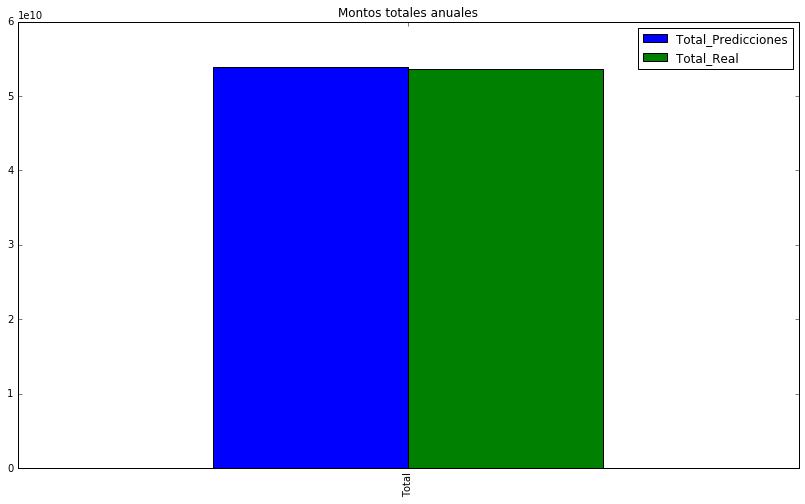

In [52]:
#mandar llamar funcion de errores

#lista paises: América Latina,Asia,Europa,Africa,Oceanía,América del Norte,otro
#lista industrias: Industrias Manufactureras//Agricultura y Silvicultura//Servicios y Productos no Clasificados 
                ## Industrias Extractivas//Ganadería, Apicultura, Caza, Pesca
#lista años: 2016, 2017
#lista meses: 8,9,10,11,12,1,2,3,4,5,6,7
col=1
pais=['Asia']
industria=['Agricultura y Silvicultura']
año=2017
mes=7
errores(variables_entrada,Y_test_KR,resultados_fun_KR,col,pais,industria,año,mes)

In [53]:
#funcion para crear data frame de datos reales y predicciones agrupadas por año y mes(montos mensuales totales)
def DF_realesvspredicciones(variables_entrada,reales,predicciones,col):
    kr=predicciones.iloc[:,col]
    kr=kr.reshape(-1,)
    ky=reales.values
    ky=ky.reshape(-1,)
    km=variables_entrada.Mes
    km=km.reshape(-1,)
    kyear=variables_entrada.Año
    kyear=kyear.reshape(-1,)
    
    d={'Año':kyear,'Mes':km,'Reales':ky,'Predicciones':kr}
    daataa=pd.DataFrame(d)
    dataagrupada=daataa.groupby(['Año','Mes'],as_index=False,sort=False).sum()
    return dataagrupada


In [54]:
#mandar llamar funcion para dataframe reales vs predicciones (montos mensuales totales):
col=1 # 
reales_predicciones=DF_realesvspredicciones(variables_entrada,Y_test_rf,resultados_fun_KR,col)
reales_predicciones

,Año,Mes,Predicciones,Reales
0,2016.0,8,4.544196e+09,4.552822e+09
1,2016.0,9,4.637748e+09,4.361642e+09
2,2016.0,10,4.231275e+09,4.409187e+09
3,2016.0,11,4.257751e+09,4.437251e+09
4,2016.0,12,4.430885e+09,3.960032e+09
5,2017.0,1,4.526268e+09,4.120849e+09
6,2017.0,2,4.413619e+09,4.054624e+09
7,2017.0,3,4.494070e+09,4.686511e+09
8,2017.0,4,4.463996e+09,4.306549e+09
9,2017.0,5,4.628545e+09,4.746069e+09


In [55]:
#funcion para errores mensuales:

def errores_mensuales(data):
    
    # errores mensuales:
    
    diferencias_abs=pd.DataFrame(abs(data.Reales.values-data.Predicciones.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(data.Predicciones)
    sum_reales=sum(data.Reales)
    diferencia_total=sum_reales-sum_predicciones
    
    errores_mensuales=pd.DataFrame(diferencias_abs.Diferencias.values/reales_predicciones.Reales.values,columns=['error_mensual'])
    errores_mensuales=errores_mensuales.join(data.Mes)
    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 

    print("Error de la suma total de predicciones mensuales: %.4g" % porcentaje_error)
    print("Error de cada prediccion mensual: %.4g" % porcentaje_error_abs)
    
    return errores_mensuales

In [56]:
#mandar llamar funcion de errores mensuales:
df_errores_mensuales=errores_mensuales(reales_predicciones)
df_errores_mensuales

Error de la suma total de predicciones mensuales: 0.004479
Error de cada prediccion mensual: 0.05772


,error_mensual,Mes
0,0.001895,8
1,0.063303,9
2,0.040350,10
3,0.040453,11
4,0.118901,12
5,0.098382,1
6,0.088539,2
7,0.041063,3
8,0.036560,4
9,0.024762,5


In [57]:
#exportar graficas errores mensuales para comparativo con errores mensuales desde datos anuales:

df_errores_mensuales.to_csv('df_errores_mensuales_imp.csv')

In [58]:
#funcion para graficar montos mensuales totales reales vs predecidos:

def graficar_monto_pred(data):
    resultados2=pd.DataFrame(data[['Reales','Predicciones']]).reset_index(drop=True)
    print(resultados2.plot(title='Datos reales vs prediccion',figsize=(14,8)))


Axes(0.125,0.125;0.775x0.775)


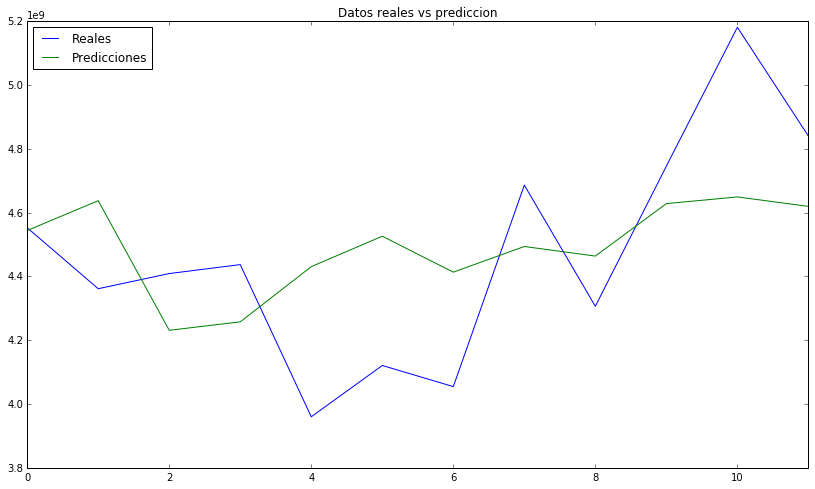

In [59]:
graficar_monto_pred(reales_predicciones)